In [1]:
# import os
# os.chdir("projects_on_GitHub/data_viz/Anscombes_Quartet_Example")

## Numeric Statistics

In [2]:
col_names = ["X1", "Y1", "X2", "Y2", "X3", "Y3","X4", "Y4"]
data = pd.read_excel('anscombes-quartet.xlsx', sheet_name='Sheet1', names = col_names, nrows=11)

In [66]:
data

,X1,Y1,X2,Y2,X3,Y3,X4,Y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [4]:
data.describe()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


## EDA Visualization

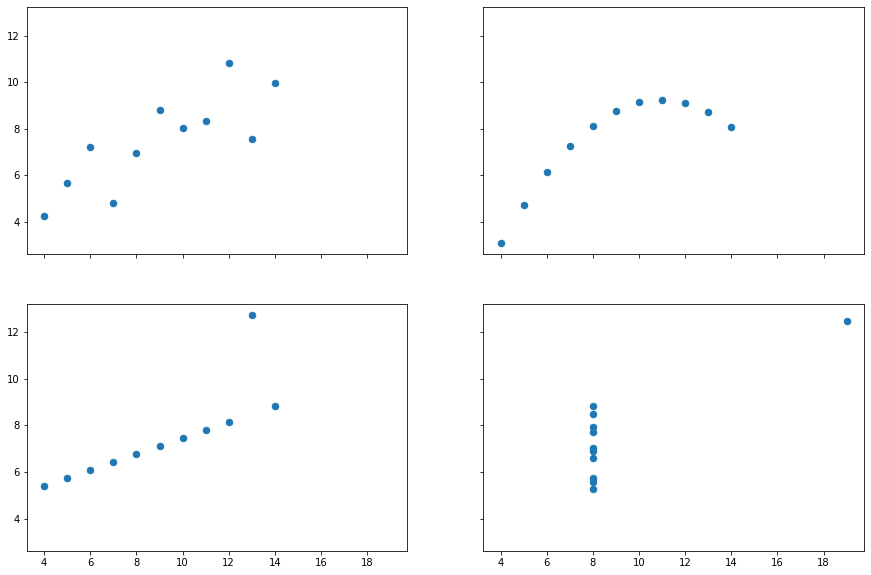

In [61]:
ansc_np = data.to_numpy().flatten(order='F').reshape(2, 2, 2, 11)

fig, ax = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(15, 10))
for row in range(2):
    for col in range(2):
        ax[row, col].plot(ansc_np[row, col][0], ansc_np[row, col][1], marker='.', markersize=13, linestyle='none');


In [147]:
def generate_equation(x, y):
    slope, intercept = np.polyfit(x, y, deg=1)
    eq_str = """
    y = {:.2f}*x + {:.2f}
    """
    return eq_str.format(slope, intercept)


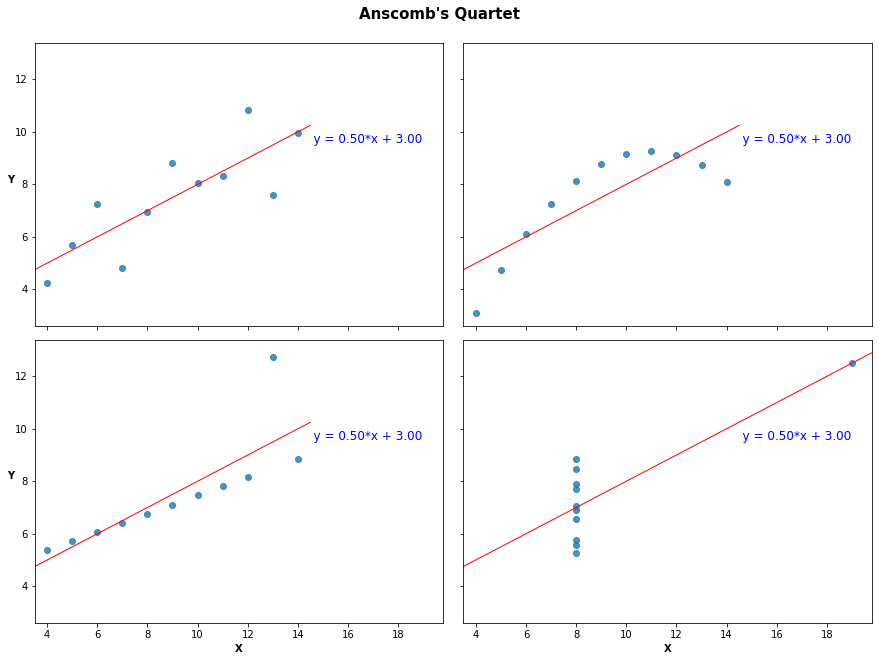

In [150]:
ansc_np = data.to_numpy().flatten(order='F').reshape(2, 2, 2, 11)

fig, ax = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(15, 10))
fig.subplots_adjust(hspace=.05, wspace=.05, top=.93)
fig.suptitle("Anscomb's Quartet", fontsize=15, fontweight='bold')
for row in range(2):
    for col in range(2):
        sns.regplot(x=ansc_np[row, col][0], 
                    y=ansc_np[row, col][1], 
                    ci=None, 
                    line_kws={'color': 'red', 'linewidth': 1}, 
                    ax=ax[row, col], truncate=False);
        ax[row, col].text(14, 9, generate_equation(ansc_np[row, col][0], ansc_np[row, col][1]), 
                          fontdict={'size':12}, color='blue')
        
ax[0,0].set_ylabel('Y', rotation=0, fontweight='bold')
ax[1,0].set_ylabel('Y', rotation=0, fontweight='bold')
ax[1,0].set_xlabel('X', fontweight='bold')
ax[1,1].set_xlabel('X', fontweight='bold')

fig.savefig('Anscombe_Viz.jpg')

## Use scikit-learn Library

In [41]:
from sklearn.linear_model import LinearRegression

In [115]:
x1 = data[['X2']].values
y1 = data[['Y2']].values


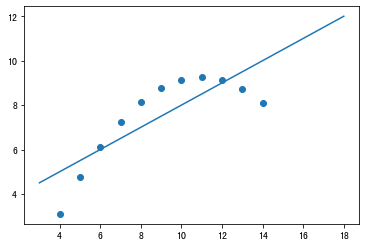

In [116]:
lm = LinearRegression()
lm.fit(x1, y1)
w, b = lm.coef_, lm.intercept_
plt.plot([3, 18], [3*w[0][0]+b[0], 18*w[0][0]+b[0]]);
plt.scatter(x1, y1);

In [127]:
def plot_reg(x, y):
    lm = LinearRegression()
    lm.fit(x, y)
    w, b = lm.coef_, lm.intercept_
    plt.plot([3, 18], [3*w[0][0]+b[0], 18*w[0][0]+b[0]]);
    plt.scatter(x, y);

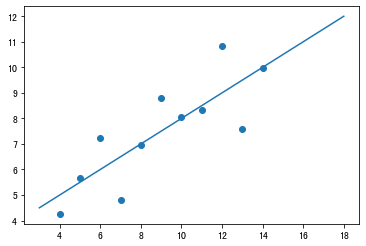

In [128]:
x, y = data[['X1']], data[['Y1']]
plot_reg(x, y)

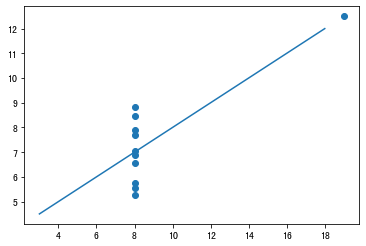

In [130]:
x, y = data[['X4']], data[['Y4']]
plot_reg(x, y)